In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Checking Twitter Label Manual.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# twitter_label_auto.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
twitter_manual_label = pd.read_csv('twitter_label_manual.csv', delimiter=',', nrows = nRowsRead)
twitter_manual_label.dataframeName = 'twitter_label_manual.csv'
nRow, nCol = twitter_manual_label.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [7]:
twitter_manual_label.head(11)

,id_str,created_at,crawled_at,screen_name,is_accident,full_text
0,1113976371515146240,2019-04-05 08:27:18,2020-02-08 12:30:29,mrahmatr7,1,"Rekaman CCTV Kecelakaan Motor di PIK, depan Ta..."
1,1114010329313206272,2019-04-05 10:42:14,2020-02-08 12:30:43,PanritaNews,1,"Tewaskan 346 Orang dalam 2 Kecelakaan, Boss Bo..."
2,1114037478237855745,2019-04-05 12:30:07,2020-02-08 12:30:56,VICE_ID,0,Anggota parlemen Taiwan juga berencana meningk...
3,1114121169873932288,2019-04-05 18:02:40,2020-02-08 12:31:38,OfficialSyariah,0,C.Gerakan.bicara pertolongan pertama pada kece...
4,1114149728323682305,2019-04-05 19:56:09,2020-02-08 12:31:54,AhliAsuransi,0,Asuransi mana nih??\n\nhttps://t.co/AJyABmimcY...
5,1114202648356331520,2019-04-05 23:26:26,2020-02-08 12:32:11,RadioElshinta,1,23.27: @PTJASAMARGA : Kunciran KM 14 - KM 16 a...
6,1114211596711157761,2019-04-06 00:02:00,2020-02-08 12:32:15,detikcom,1,Terjadi kecelakaan truk muatan besar di Tol Ku...
7,1114430434694139904,2019-04-06 14:31:35,2020-02-08 12:33:11,adekrsnnd,0,"Plot twist: Ibunya abis kecelakaan, nemenin ke..."
8,1115096070793629696,2019-04-08 10:36:35,2020-02-08 12:47:30,TMC_Kebumen,0,UPDATE LAGI JADWAL SAMSAT KELILING DAN SAMSAT ...
9,1115167875721859072,2019-04-08 15:21:55,2020-02-08 12:48:12,noonalin2,0,Dapet video kejadian kecelakaan tunggal di Mar...


In [8]:
print(len(twitter_manual_label.loc[twitter_manual_label['is_accident'] == 1]))
print(len(twitter_manual_label.loc[twitter_manual_label['is_accident'] == 0]))

360
640


In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# twitter.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
twitter = pd.read_csv('twitter.csv', delimiter=',', nrows = nRowsRead)
twitter.dataframeName = 'twitter.csv'
nRow, nCol = twitter.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [10]:
twitter.head()

,id_str,created_at,crawled_at,screen_name,full_text,full_tweet
0,1113812743138697216,2019-04-04 21:37:06,2020-02-08 12:30:13,vtvindonesia,Pelajar SMP Tewas Kecelakaan di Jalinsum Banda...,"{""created_at"": ""Thu Apr 04 14:37:06 +0000 2019..."
1,1113813804708548608,2019-04-04 21:41:19,2020-02-08 12:30:13,briand_fergie,Orang-orang pulang nonton film ini langsung ga...,"{""created_at"": ""Thu Apr 04 14:41:19 +0000 2019..."
2,1113823718956908545,2019-04-04 22:20:43,2020-02-08 12:30:13,dimanamacetid,[22:14] #JAKARTA #KECELAKAAN Rawamangun #TMC,"{""created_at"": ""Thu Apr 04 15:20:43 +0000 2019..."
3,1113846220986900480,2019-04-04 23:50:08,2020-02-08 12:30:14,imaamhanavi,[83:1] Kecelakaan besarlah bagi orang-orang ya...,"{""created_at"": ""Thu Apr 04 16:50:08 +0000 2019..."
4,1113847850801090560,2019-04-04 23:56:36,2020-02-08 12:30:14,mdntkptr,"Anggapannya kayak mobil vs motor kecelakaan, y...","{""created_at"": ""Thu Apr 04 16:56:36 +0000 2019..."


In [11]:
plotPerColumnDistribution(twitter, 10, 5)

NameError: name 'plotPerColumnDistribution' is not defined

## Shuffling the Data if needed

In [ ]:
from sklearn.utils import shuffle
#twitter_manual_label = shuffle(twitter_manual_label)
twitter_manual_label.head(11)
twitter_manual_label.tail(11)

In [ ]:
twitter_manual_label[['is_accident','full_text']]

# Cleaning the X Data and setting up parameter

 Emoji dan link (https) pada twitter perlu dihilangkan karena dapat menimbulkan bias pada data twitter, selain itu banyak

In [12]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"# flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

Hyperparameter

In [13]:
vocab_size = 4000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [14]:
import re
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
corpus = []
#http_pattern = "^(https?://)?/i"
for i in twitter_manual_label['full_text']:
    data = i
    data = re.sub("https://t.co/\S*","",data)
    data = re.sub("\n","",data)
    data = re.sub("[0-9]","",data)
    data = deEmojify(data)
    #data = data.replace(http_pattern, "")
    corpus.append(data.lower())
    
len(corpus)

1000

In [15]:
corpus

['rekaman cctv kecelakaan motor di pik, depan taman grisenda : mhmmdrhmtrmdhnvisit wonderful  #mrahmatramadhan',
 'tewaskan  orang dalam  kecelakaan, boss boeing minta maaf ',
 'anggota parlemen taiwan juga berencana meningkatkan denda maksimum dan masa hukuman bagi orang yang menyetir dalam keadaan mabuk. ',
 'c.gerakan.bicara pertolongan pertama pada kecelakaan (pk-bakat) ',
 'asuransi mana nih??ppatk tidak memberikan rincian secara pasti siapa dan darimana asal partai caleg tersebut. saat ini, pihaknya telah... ',
 '.: @ptjasamarga : kunciran km  - km  arah bitung padat, ada penanganan kecelakaan kendaraan truk fuso di bahu jalan.',
 'terjadi kecelakaan truk muatan besar di tol kunciran, serpong arah bitung. akibatnya, terjadi kepadatan di lokasi kecelakaan. ',
 'plot twist: ibunya abis kecelakaan, nemenin ke ugd dan baru bisa ditinggal.tapi ya ga masalah sih. yg penting kan etika profesional. ',
 'update lagi jadwal samsat keliling dan samsat desa.tertib bayar pajak yuk, .stop pela

Hasil Preprocessing

In [16]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'<OOV>': 1, 'kecelakaan': 2, 'di': 3, 'yang': 4, 'dan': 5, 'yg': 6, 'ada': 7, 'korban': 8, 'tol': 9, 'ini': 10, 'km': 11, 'orang': 12, 'itu': 13, 'jalan': 14, 'dari': 15, 'dalam': 16, 'arah': 17, 'aku': 18, 'lalu': 19, 'untuk': 20, 'terjadi': 21, 'mobil': 22, 'ke': 23, 'karena': 24, 'truk': 25, 'juga': 26, 'motor': 27, 'ya': 28, 'meninggal': 29, 'sama': 30, 'tewas': 31, 'lintas': 32, 'kendaraan': 33, 'kalo': 34, 'aja': 35, 'penanganan': 36, 'tapi': 37, 'ga': 38, 'padat': 39, 'wib': 40, 'saat': 41, 'mau': 42, 'bisa': 43, 'sakit': 44, 'pada': 45, 'lagi': 46, 'hari': 47, 'bus': 48, 'tidak': 49, 'dia': 50, 'banget': 51, 'pas': 52, 'hati': 53, 'apa': 54, 'maut': 55, 'dengan': 56, 'cipularang': 57, 'gak': 58, 'mengalami': 59, 'jadi': 60, 'satu': 61, 'kita': 62, 'lajur': 63, 'masih': 64, 'bgt': 65, 'sudah': 66, 'gue': 67, 'akibat': 68, 'amp': 69, 'depan': 70, 'nya': 71, 'udah': 72, 'beruntun': 73, 'bagi': 74, 'baru': 75, 'jakarta': 76, 'adalah': 77, 'dunia': 78, 'saya': 79, 'kerja': 80, 'sem

In [17]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

In [18]:
input_sequences

[[2007, 896, 2, 27, 3, 2008, 70, 696, 2009, 2010, 2011, 2012],
 [556, 12, 16, 2, 2013, 462, 196, 897],
 [284,
  2014,
  2015,
  26,
  2016,
  1262,
  1263,
  2017,
  5,
  463,
  2018,
  74,
  12,
  4,
  2019,
  16,
  395,
  396],
 [1264, 1265, 1266, 557, 228, 45, 2, 2020, 2021],
 [357,
  464,
  465,
  2022,
  49,
  211,
  2023,
  697,
  320,
  285,
  5,
  1267,
  286,
  2024,
  2025,
  170,
  41,
  10,
  2026,
  146],
 [321, 397, 11, 11, 17, 698, 39, 7, 36, 2, 33, 25, 1268, 3, 229, 14],
 [21, 2, 25, 398, 358, 3, 9, 397, 466, 17, 698, 2027, 21, 126, 3, 147, 2],
 [2028,
  2029,
  2030,
  100,
  2,
  2031,
  23,
  2032,
  5,
  75,
  43,
  558,
  37,
  28,
  38,
  699,
  171,
  6,
  559,
  148,
  2033,
  2034],
 [359,
  46,
  2035,
  1269,
  1270,
  5,
  1269,
  197,
  467,
  2036,
  1271,
  898,
  127,
  2037,
  2038,
  899],
 [560,
  112,
  101,
  2,
  113,
  3,
  2039,
  1272,
  118,
  138,
  28,
  102,
  186,
  900,
  66,
  84,
  92,
  6,
  2040,
  172,
  38,
  561,
  187,
  186,
  360

In [19]:
len(input_sequences)

1000

In [20]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
X = input_sequences
y = np.array(twitter_manual_label['is_accident'])

In [21]:
print(len(X))
print(len(y))

1000
1000


In [22]:
print(len(X[0]))

53


In [23]:
print(X)
print(y)

[[   0    0    0 ... 2010 2011 2012]
 [   0    0    0 ...  462  196  897]
 [   0    0    0 ...   16  395  396]
 ...
 [   0    0    0 ...   13  527  223]
 [   0    0    0 ...    7    1    1]
 [   0    0    0 ...  144    1    1]]
[1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0
 1 1 0 1 0 0 1 0 0 1 1

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [25]:
print(len(X_train))
print(len(y_train))
print(len(X_train[1]))
max_length = len(X_train[1])

500
500
53


In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.93):
            print("\nReached 92% validation accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

## Model 1 Overfit, val accuracy 88%

In [30]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.python.keras.layers.recurrent_buatan import LSTM
from tensorflow.python.keras.layers.recurrent_buatan import LSTMCell

In [31]:
embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_length))
model.add(LSTM(53))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 53, 32)            128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 53)                18232     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 54        
Total params: 146,286
Trainable params: 146,286
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_accuracy',verbose=0,save_best_only=True,mode='auto')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=50, callbacks=[checkpoint])

Epoch 1/75
 7/10 [====================>.........] - ETA: 0s - loss: 0.6882 - accuracy: 0.6029

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
type(history)
history

## Model 2 Bidirectional Val accuracy 89% overfitt

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vecor_length, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(53)),
    #53 karena max words nya ada 53
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 53, 32)            128000    
_________________________________________________________________
bidirectional (Bidirectional (None, 106)               36464     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                2568      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 167,057
Trainable params: 167,057
Non-trainable params: 0
_________________________________________________________________


In [33]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=50,callbacks=[checkpoint])

Epoch 1/75
15/15 [==============================] - 5s 89ms/step - loss: 0.6859 - accuracy: 0.6109 - val_loss: 0.6737 - val_accuracy: 0.5960
Epoch 2/75
15/15 [==============================] - 0s 24ms/step - loss: 0.6529 - accuracy: 0.6269 - val_loss: 0.6694 - val_accuracy: 0.5960
Epoch 3/75
15/15 [==============================] - 0s 25ms/step - loss: 0.5737 - accuracy: 0.6609 - val_loss: 0.8934 - val_accuracy: 0.6200
Epoch 4/75
15/15 [==============================] - 0s 26ms/step - loss: 0.4179 - accuracy: 0.8820 - val_loss: 0.4619 - val_accuracy: 0.8200
Epoch 5/75
15/15 [==============================] - 0s 22ms/step - loss: 0.3000 - accuracy: 0.9276 - val_loss: 0.4439 - val_accuracy: 0.8560
Epoch 6/75
15/15 [==============================] - 0s 23ms/step - loss: 0.1224 - accuracy: 0.9635 - val_loss: 0.4361 - val_accuracy: 0.8480
Epoch 7/75
15/15 [==============================] - 0s 23ms/step - loss: 0.1006 - accuracy: 0.9641 - val_loss: 0.4902 - val_accuracy: 0.8520
Epoch 8/75
15

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


Epoch 9/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.5268 - val_accuracy: 0.8760
Epoch 10/75
15/15 [==============================] - 0s 22ms/step - loss: 0.0314 - accuracy: 0.9890 - val_loss: 0.5690 - val_accuracy: 0.8440
Epoch 11/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0291 - accuracy: 0.9873 - val_loss: 0.5706 - val_accuracy: 0.8920


INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


Epoch 12/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.6332 - val_accuracy: 0.8720
Epoch 13/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0166 - accuracy: 0.9964 - val_loss: 0.6663 - val_accuracy: 0.8720
Epoch 14/75
15/15 [==============================] - 0s 22ms/step - loss: 0.0133 - accuracy: 0.9975 - val_loss: 0.6516 - val_accuracy: 0.8840
Epoch 15/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0086 - accuracy: 0.9989 - val_loss: 0.6643 - val_accuracy: 0.8840
Epoch 16/75
15/15 [==============================] - 0s 23ms/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.6877 - val_accuracy: 0.8840
Epoch 17/75
15/15 [==============================] - 0s 22ms/step - loss: 0.0109 - accuracy: 0.9949 - val_loss: 0.6990 - val_accuracy: 0.8640
Epoch 18/75
15/15 [==============================] - 0s 22ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.7393 - val_accuracy: 0.8800
Epoch 

Epoch 69/75
15/15 [==============================] - 0s 22ms/step - loss: 8.2737e-04 - accuracy: 1.0000 - val_loss: 1.0509 - val_accuracy: 0.8520
Epoch 70/75
15/15 [==============================] - 0s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0589 - val_accuracy: 0.8520
Epoch 71/75
15/15 [==============================] - 0s 22ms/step - loss: 2.6554e-04 - accuracy: 1.0000 - val_loss: 1.0747 - val_accuracy: 0.8520
Epoch 72/75
15/15 [==============================] - 0s 22ms/step - loss: 6.0487e-04 - accuracy: 1.0000 - val_loss: 1.0894 - val_accuracy: 0.8520
Epoch 73/75
15/15 [==============================] - 0s 22ms/step - loss: 2.4434e-04 - accuracy: 1.0000 - val_loss: 1.0985 - val_accuracy: 0.8520
Epoch 74/75
15/15 [==============================] - 0s 23ms/step - loss: 2.0157e-04 - accuracy: 1.0000 - val_loss: 1.1080 - val_accuracy: 0.8520
Epoch 75/75
15/15 [==============================] - 0s 22ms/step - loss: 1.3454e-04 - accuracy: 1.0000 - val_loss: 1.1159 - val

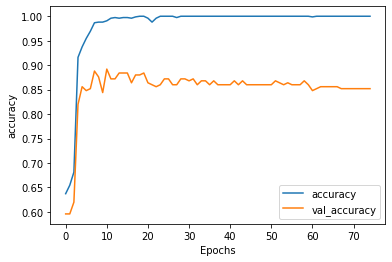

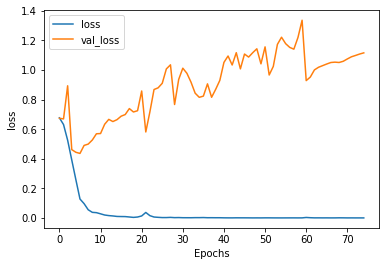

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [35]:
model.save("Bidirectional LSTM + 24 DNN.h5")

## Model 3 Bidirectional LSTM 88%

In [36]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_length))
model.add(Bidirectional(LSTM(53)))
model.add(Dense(1, activation='sigmoid'))
#adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 53, 32)            128000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 106)               36464     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 107       
Total params: 164,571
Trainable params: 164,571
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=50,callbacks=[checkpoint])

Epoch 1/50
15/15 [==============================] - 4s 81ms/step - loss: 0.6773 - accuracy: 0.6561 - val_loss: 0.6748 - val_accuracy: 0.5960
Epoch 2/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6176 - accuracy: 0.6627 - val_loss: 0.6189 - val_accuracy: 0.5960
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.4864 - accuracy: 0.7013 - val_loss: 0.4858 - val_accuracy: 0.8000
Epoch 4/50
15/15 [==============================] - 0s 21ms/step - loss: 0.3092 - accuracy: 0.9003 - val_loss: 0.3970 - val_accuracy: 0.8720
Epoch 5/50
15/15 [==============================] - 0s 21ms/step - loss: 0.2170 - accuracy: 0.9444 - val_loss: 0.5229 - val_accuracy: 0.7160
Epoch 6/50
15/15 [==============================] - 0s 21ms/step - loss: 0.3217 - accuracy: 0.8251 - val_loss: 0.4175 - val_accuracy: 0.8480
Epoch 7/50
15/15 [==============================] - 0s 21ms/step - loss: 0.1833 - accuracy: 0.9585 - val_loss: 0.4593 - val_accuracy: 0.8440
Epoch 8/50
15

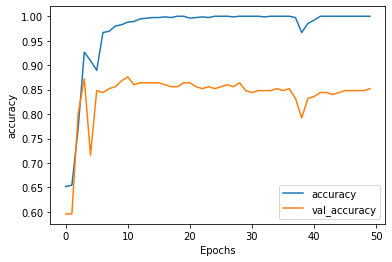

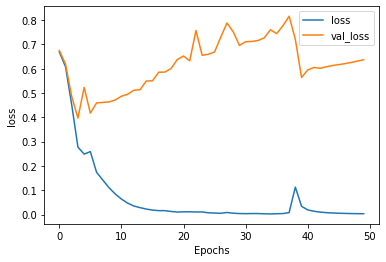

In [38]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Using The Model

In [39]:
data = "Polisi menduga, kecelakaan ini dikarenakan kelalaian pengemudi saat melintas di perlintasan kereta api tanpa palang pintu tersebut."
data = re.sub("https://t.co/\S*","",data)
data = re.sub("\n","",data)
data = re.sub("[0-9]","",data)
data = deEmojify(data)

In [40]:
corpus_test = []
#http_pattern = "^(https?://)?/i"
data = "Part2 Namun di bulan Desember Allah lebih sayang anakku ,dan aku keguguran Belum ada 1 bln setelah aku keguguran suami kecelakaan motor  entah harus bagaimana di posisi saat itu.suami tangannya patah jari nya di amputasi dan kakinya dislokasi down banget liat suami waktu itu ."
data = "puji Tuhan sampai rumah, hampir kecelakaan tapi  Tuhan jauhkan, seperti biasa dirumah tidak ada makanan Smiling face with 3 hearts"
data = "Investigasi Koran Tempo, Polisi yang Mati Kecelakaan bukan Terlibat Pembunuhan 6 Laskar FPI"
data = "Kecelakaan Maut di Sragen, Memilukan, Suhardi Saksikan Detik-detik Istri Meninggal di Jalanan"
data = "1Sepeda motor Honda Beat BL 5988 AAE yang dinaiki bersama abangnya diduga menabrak bagian belakang truk Mitsubishi Cold BL 8587 LG yang disopiri Anwar (41), warga Air Dingin, Kecamatan Simeulue Timur, Simeulue."
data = "12.50 Kecelakaan lalu lintas Out Off Control di Jl Yos Sudarso sebelum Astrido Toyota Yos Sudarso arah Plumpang, sedang dalam penanganan petugas & dibawa ke RS. Mulyasari. Harap berhati-hati dalam berkendara, selalu patuhi rambu-rambu lalu lintas."
data = re.sub("https://t.co/\S*","",data)
data = re.sub("\n","",data)
data = re.sub("[0-9]","",data)
data = deEmojify(data)
#data = data.replace(http_pattern, "")
corpus_test.append(data.lower())
    
corpus_test

['. kecelakaan lalu lintas out off control di jl yos sudarso sebelum astrido toyota yos sudarso arah plumpang, sedang dalam penanganan petugas & dibawa ke rs. mulyasari. harap berhati-hati dalam berkendara, selalu patuhi rambu-rambu lalu lintas.']

In [41]:
test = []
for line in corpus_test:
    token_list = tokenizer.texts_to_sequences([line])[0]
    test.append(token_list)

In [42]:
test = np.array(pad_sequences(test, maxlen=max_sequence_len, padding='pre'))
len(test[0])

53

In [43]:
model.predict(test)

array([[0.97790194]], dtype=float32)